Recommender system using Amazon reviews:

The dataset has been downloaded from "/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv"

Two models have been devised using

1.popularity based:- It works by understanding maximum rated product by the user.

2.Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. 

It is mainly of two types: a) User-User b) Item -Item

The dataset is available at : https://drive.google.com/open?id=15EbkU8Y8QZhPM7IRwIIWXkJhRAw_EpUo


In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#load the dataset and add headers

df_rating_data = pd.read_csv("./ratings_Electronics .csv/ratings_Electronics.csv")
df_rating_data.columns =["user_id", "product_id","rating","timestamp"]

#display the dataset
df_rating_data.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
#check the shape of the dataset

df_rating_data.shape

(7824481, 4)

In [37]:

# take the subset of the database for ease of processing

df_subset =df_rating_data.iloc[:500000,0:]

#dropped the timestamp column as it is of no relevance here while analysing the rating

df_subset.drop(['timestamp'],inplace=True,axis=1)            
df_subset.describe()


,rating
count,500000.000000
mean,3.987004
std,1.396388
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
#check for nulls if any

df_subset.isnull().sum()
#the dataset is cleaned with no null values


user_id       0
product_id    0
rating        0
dtype: int64

In [31]:
df_subset.describe()['rating']

count    500000.000000
mean          3.987004
std           1.396388
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [32]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df_subset.rating.min()))
print('Maximum rating is: %d' %(df_subset.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


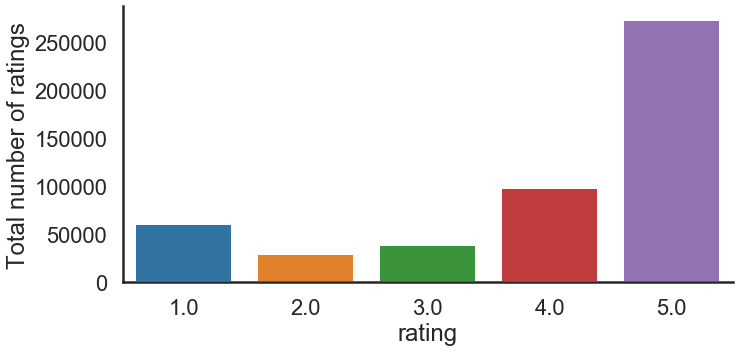

In [7]:

# Check the distribution of the rating

with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_subset, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
    
#most of the people has given the rating of 5


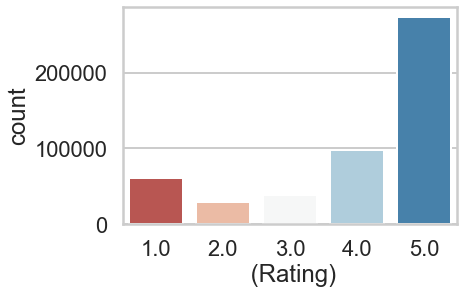

In [8]:
sns.countplot(x='rating', data=df_subset, palette='RdBu')
plt.xlabel(' (Rating)')
plt.show()

In [36]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings  :",df_subset.shape[0])
print("Total No of Users     :", len(np.unique(df_subset.user_id)))
print("Total No of products  :", len(np.unique(df_subset.product_id)))

Total data 
--------------------------------------------------

Total no of ratings  : 500000
Total No of Users     : 404347
Total No of products  : 30666


In [9]:
df_subset.head()
df_subset.shape
df_productwise_rating = df_subset.groupby('product_id')['rating'].mean().sort_values(ascending=False)
df_productwise_rating.head()


product_id
0321732944    5.0
B000078CVG    5.0
B0001MVL3M    5.0
B0000787O0    5.0
B0001MZ6Y2    5.0
Name: rating, dtype: float64

In [10]:
df_subset.groupby('product_id')['rating'].count().sort_values(ascending=False).head()

product_id
B0002L5R78    9487
B0001FTVEK    5345
B00007E7JU    3523
B00007M1TZ    2608
B00004ZCJE    2547
Name: rating, dtype: int64

In [11]:
new_df=df_subset.groupby("product_id").filter(lambda x:x['rating'].count() >=500)
new_df.head()

new_df.shape

(112123, 3)

In [41]:


df_rating_productwise = pd.DataFrame(new_df.groupby('product_id')['rating'].mean())
df_rating_productwise['no_of_rating'] = new_df.groupby('product_id')['rating'].count()
df_rating_productwise.head()


9487

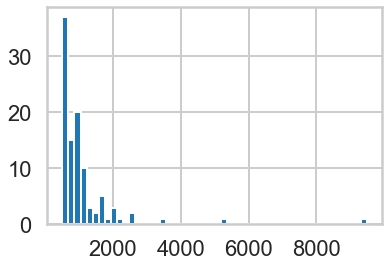

In [42]:
df_rating_productwise['no_of_rating'].hist(bins=50)

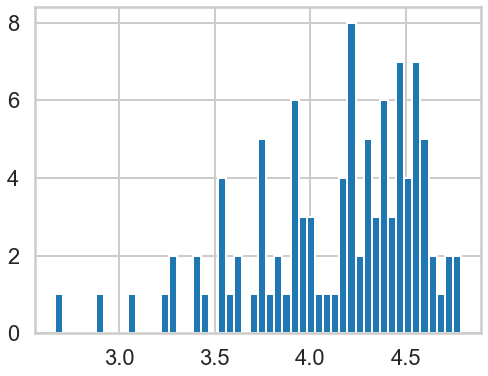

In [45]:
plt.figure( figsize=(8,6))
df_rating_productwise['rating'].hist(bins=50)

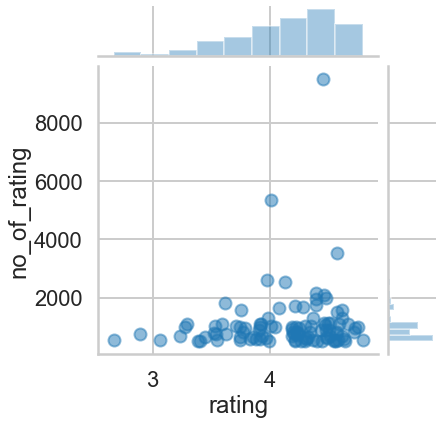

In [15]:
sns.jointplot(x='rating',y='no_of_rating',data = df_rating_productwise,alpha=0.5)

In [16]:
df_rating_productwise.sort_values('no_of_rating',ascending=False).head()

,rating,no_of_rating
product_id,,
B0002L5R78,4.448614,9487
B0001FTVEK,4.007109,5345
B00007E7JU,4.565995,3523
B00007M1TZ,3.976610,2608
B00004ZCJE,4.123675,2547


In [49]:
rating_mat = new_df.pivot_table(index='user_id',columns='product_id',values='rating',fill_value=0)

rating_mat.head()

product_id,0972683275,B00001P4XA,B00001P4ZH,B00001WRSJ,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004VUGJ,B00004WCGF,...,B0002AHT0M,B0002CPBWI,B0002CZHN6,B0002D03ZW,B0002IWC9C,B0002JY712,B0002KVQBA,B0002L5R78,B0002LEMWE,B0002MQGOK
user_id,,,,,,,,,,,,,,,,,,,,,
A0004478EF5NFPHLGCWG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0015232111B3971DPSKF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00328742CDZTXNDCB9XW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00471742QKXLMG5CCZQO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


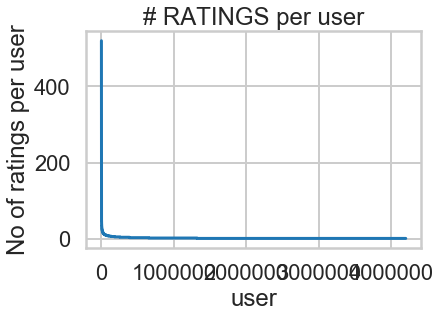

In [18]:
no_of_rated_products_per_user = df_rating_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

plt.plot(no_of_rated_products_per_user.values)
plt.title('# RATINGS per user')
plt.xlabel('user')
plt.ylabel('No of ratings per user')
plt.show()

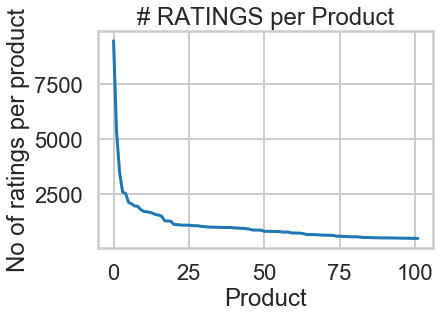

In [19]:
no_of_ratings_per_product = new_df.groupby(by='product_id')['rating'].count().sort_values(ascending=False)
no_of_ratings_per_product.head()


plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
plt.show()

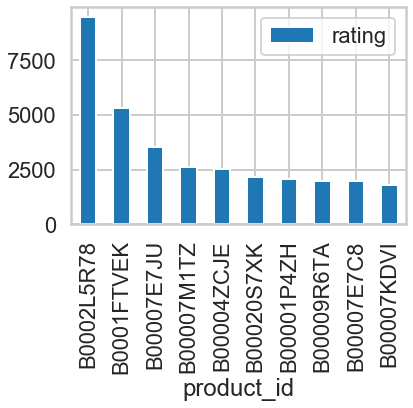

In [50]:
popular_products = pd.DataFrame(new_df.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10).plot(kind = "bar")

Collaborative Filtering :

Now we will use different method of collaborative filtering method using cosine similarity 
Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.
Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [58]:
rating_mat.head()

product_id,0972683275,B00001P4XA,B00001P4ZH,B00001WRSJ,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004VUGJ,B00004WCGF,...,B0002AHT0M,B0002CPBWI,B0002CZHN6,B0002D03ZW,B0002IWC9C,B0002JY712,B0002KVQBA,B0002L5R78,B0002LEMWE,B0002MQGOK
user_id,,,,,,,,,,,,,,,,,,,,,
A0004478EF5NFPHLGCWG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0015232111B3971DPSKF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00328742CDZTXNDCB9XW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00471742QKXLMG5CCZQO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#using collaborative filitering to find the similar rows
#there could be the possibility where the user product has been rated by only one user 
#or the user might have rated only one product
#to avoid this we are standardizing each row of the pivot table  by using mean, max and min values of the user

def standardize(row):
    new_row = (row-row.mean())/(row.max()-row.min())
    return new_row
df_pivot_std = rating_mat.apply(standardize)
df_pivot_std.head()

product_id,0972683275,B00001P4XA,B00001P4ZH,B00001WRSJ,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004VUGJ,B00004WCGF,...,B0002AHT0M,B0002CPBWI,B0002CZHN6,B0002D03ZW,B0002IWC9C,B0002JY712,B0002KVQBA,B0002L5R78,B0002LEMWE,B0002MQGOK
user_id,,,,,,,,,,,,,,,,,,,,,
A0004478EF5NFPHLGCWG,-0.008867,-0.004187,-0.017449,-0.013794,-0.007797,-0.007439,-0.013666,-0.00655,-0.004253,-0.005791,...,-0.005148,-0.012656,-0.005301,-0.004217,-0.004351,-0.007335,-0.012975,-0.079638,-0.006812,-0.004789
A0015232111B3971DPSKF,-0.008867,-0.004187,-0.017449,-0.013794,-0.007797,-0.007439,-0.013666,-0.00655,-0.004253,-0.005791,...,-0.005148,-0.012656,-0.005301,-0.004217,-0.004351,-0.007335,-0.012975,-0.079638,-0.006812,-0.004789
A00328742CDZTXNDCB9XW,-0.008867,-0.004187,-0.017449,-0.013794,-0.007797,-0.007439,-0.013666,-0.00655,-0.004253,-0.005791,...,-0.005148,-0.012656,-0.005301,-0.004217,-0.004351,-0.007335,-0.012975,-0.079638,-0.006812,-0.004789
A00471742QKXLMG5CCZQO,-0.008867,-0.004187,-0.017449,-0.013794,-0.007797,-0.007439,-0.013666,-0.00655,-0.004253,-0.005791,...,-0.005148,-0.012656,-0.005301,-0.004217,-0.004351,-0.007335,-0.012975,-0.079638,-0.006812,-0.004789
A00625243BI8W1SSZNLMD,-0.008867,-0.004187,-0.017449,-0.013794,-0.007797,-0.007439,-0.013666,-0.00655,-0.004253,-0.005791,...,-0.005148,-0.012656,-0.005301,-0.004217,-0.004351,-0.007335,-0.012975,-0.079638,-0.006812,-0.004789


In [22]:

prod_similarity = cosine_similarity(df_pivot_std.T)
print(prod_similarity)

[[ 1.00000000e+00 -6.84820686e-03 -1.35314573e-02 ... -2.73248567e-02
  -7.77302491e-03 -4.22145471e-03]
 [-6.84820686e-03  1.00000000e+00 -3.12476093e-03 ... -2.01731756e-02
  -3.96278326e-03 -7.69295248e-04]
 [-1.35314573e-02 -3.12476093e-03  1.00000000e+00 ... -3.91322364e-02
  -8.17113620e-03 -8.80670546e-03]
 ...
 [-2.73248567e-02 -2.01731756e-02 -3.91322364e-02 ...  1.00000000e+00
  -2.11041301e-02  1.41574317e-02]
 [-7.77302491e-03 -3.96278326e-03 -8.17113620e-03 ... -2.11041301e-02
   1.00000000e+00 -6.08286453e-03]
 [-4.22145471e-03 -7.69295248e-04 -8.80670546e-03 ...  1.41574317e-02
  -6.08286453e-03  1.00000000e+00]]


In [23]:
prod_similarity_df = pd.DataFrame(prod_similarity,index = rating_mat.columns, columns =rating_mat.columns)
prod_similarity_df.head()

product_id,0972683275,B00001P4XA,B00001P4ZH,B00001WRSJ,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004VUGJ,B00004WCGF,...,B0002AHT0M,B0002CPBWI,B0002CZHN6,B0002D03ZW,B0002IWC9C,B0002JY712,B0002KVQBA,B0002L5R78,B0002LEMWE,B0002MQGOK
product_id,,,,,,,,,,,,,,,,,,,,,
0972683275,1.000000,-0.006848,-0.013531,-0.010955,-0.009262,-0.008188,-0.012075,-0.008385,-0.006672,-0.007724,...,-0.007522,-0.010925,-0.007377,-0.006670,-0.006729,-0.008550,-0.011567,-0.027325,-0.007773,-0.004221
B00001P4XA,-0.006848,1.000000,-0.003125,-0.008478,-0.006615,-0.006397,-0.004017,-0.005494,-0.004765,-0.005516,...,-0.005372,-0.007174,-0.005268,-0.004764,-0.004806,-0.006106,-0.006827,-0.020173,-0.003963,-0.000769
B00001P4ZH,-0.013531,-0.003125,1.000000,-0.011552,-0.012635,-0.012640,-0.010136,-0.010856,-0.006447,-0.010289,...,-0.009723,-0.015963,-0.010410,-0.003330,-0.009496,-0.012066,-0.016106,-0.039132,-0.008171,-0.008807
B00001WRSJ,-0.010955,-0.008478,-0.011552,1.000000,-0.011466,-0.009743,-0.013483,-0.009947,-0.007464,-0.009562,...,-0.008075,-0.012149,-0.008190,-0.006918,-0.008331,-0.009598,-0.011452,-0.034593,-0.008822,-0.008709
B00004SABB,-0.009262,-0.006615,-0.012635,-0.011466,1.000000,-0.007244,-0.011291,-0.008099,-0.006445,-0.006899,...,-0.006582,-0.011313,-0.007125,-0.006443,-0.004692,-0.005370,-0.011173,-0.027828,-0.006586,-0.003705


In [59]:
def get_similar_products(productid,rating):
    similar_score = prod_similarity_df[productid] *(rating - 2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

recommendation = (get_similar_products("0972683275",1)).head(5)
    
recommendation

product_id
B0002L5R78    0.040987
B0001FTVEK    0.030575
B00007E7JU    0.025693
B00004ZCJE    0.021522
B00001P4ZH    0.020297
Name: 0972683275, dtype: float64

#Now we will try to do item-item based filtering and recommendation

In [86]:
rating_mat.head()


product_id,0972683275,B00001P4XA,B00001P4ZH,B00001WRSJ,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004VUGJ,B00004WCGF,...,B0002AHT0M,B0002CPBWI,B0002CZHN6,B0002D03ZW,B0002IWC9C,B0002JY712,B0002KVQBA,B0002L5R78,B0002LEMWE,B0002MQGOK
user_id,,,,,,,,,,,,,,,,,,,,,
A0004478EF5NFPHLGCWG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0015232111B3971DPSKF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00328742CDZTXNDCB9XW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00471742QKXLMG5CCZQO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00625243BI8W1SSZNLMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


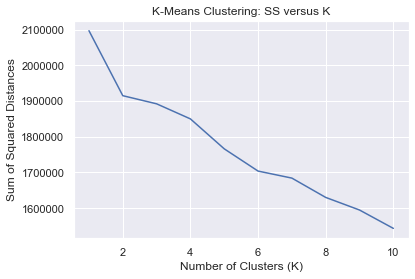

In [100]:


x_cols = rating_mat[:]
ss = []

from sklearn.cluster import KMeans
import numpy as np
cluster_range = range(1,11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_cols)
    ss.append(kmeans.inertia_)

sns.set()    
plt.plot(cluster_range,ss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Clustering: SS versus K')
plt.show()

0     8580
1    97409
dtype: int64


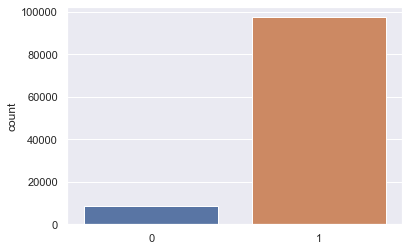

In [103]:
#elbow value estimated as 2 as per the graph above

final_model  = KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
final_model.fit(x_cols)
clusters = final_model.predict(x_cols)

df = pd.DataFrame({'clusters': clusters})
cluster_size = df.groupby(clusters).size()
print(cluster_size)
sns.countplot(clusters)

In [101]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# make the index into a column
X = rating_mat.reset_index()

# only use 1/0's for training
X_train = X[X.columns[1:]]


x_cols = rating_mat[:]

X_pca = X_train.copy()
pca = PCA(n_components=2)
pca.fit(X_pca.transpose())
xs = pca.components_[0]
ys = pca.components_[1]

final_model  = KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10, random_state=0)
final_model.fit(x_cols)
clusters = final_model.predict(x_cols)

df_pca = pd.DataFrame({'Product Id': X['user_id'],'clusters': clusters,'x': xs, 'y': ys})

print('explained variance ratio:', pca.explained_variance_ratio_)
print('components shape:', pca.components_.shape)
df_pca.head()


#rating_mat.shape

explained variance ratio: [0.09383138 0.04453891]
components shape: (2, 105989)


,Product Id,clusters,x,y
0,A0004478EF5NFPHLGCWG,1,-0.000088,-0.000112
1,A0015232111B3971DPSKF,1,-0.000068,-0.000088
2,A00328742CDZTXNDCB9XW,1,-0.000034,0.003240
3,A00471742QKXLMG5CCZQO,1,-0.000091,-0.000117
4,A00625243BI8W1SSZNLMD,1,-0.000088,-0.000112


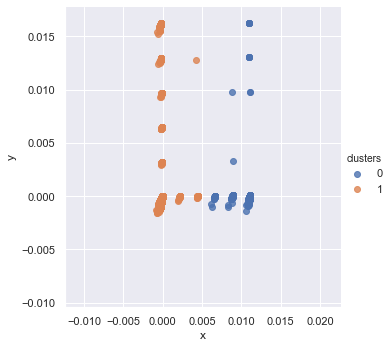

In [102]:

sns.lmplot(x='x', y='y', data=df_pca, hue='clusters', fit_reg=False)

In [69]:

X = rating_mat.T
X1 = X
X1.shape
X1.head()


user_id,A0004478EF5NFPHLGCWG,A0015232111B3971DPSKF,A00328742CDZTXNDCB9XW,A00471742QKXLMG5CCZQO,A00625243BI8W1SSZNLMD,A00988692Q9ZDJUD8BQSM,A00995931BE16NG4F52QC,A01035471LBTPFWCOKAU2,A01262391CVDKK68IDCWS,A01293253GNI9N7MLGW7W,...,AZZOFVMQC0BJG,AZZQ4AHH7N9CH,AZZQFCVCFE8HL,AZZRXD27FMRE4,AZZTA5HXXF7U4,AZZTL8XTG4SDH,AZZUGL25FXYZX,AZZV891DC7X6Q,AZZVYHVJ8BDUZ,AZZYWDOD33FFE
product_id,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001P4XA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001P4ZH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00001WRSJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00004SABB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


(102, 10)

In [64]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(102, 102)

In [77]:
X.index[30]

'B000067O5G'

In [78]:
i = "B000067O5G"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

30

In [79]:
#Correlation for all items with the item purchased by this customer 
#based on items rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(102,)

In [81]:
Recommend = list(X.index[correlation_product_ID > 0.50])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['B00001P4XA',
 'B00001WRSJ',
 'B00004VUGJ',
 'B00005ARK3',
 'B00005ATMB',
 'B00005NIMJ',
 'B00005T3G0',
 'B000062VUO',
 'B000067RC4',
 'B000067RT6']